# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())
        
# Print the city count to confirm sufficient count
print(len(cities))


620


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,bilibino,,RU,,,,,,
1,cockburn town,,TC,,,,,,
2,severo-kurilsk,,RU,,,,,,
3,norman wells,,CA,,,,,,
4,tuktoyaktuk,,CA,,,,,,


In [10]:
index_counter = 0
set_counter = 1

#set up base url
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

print("Beginning Data Retrieval")
print("--------------------------------")

#Iterate through 
for index, row in city_weather.iterrows():
    query_url = base_url + row['City'] + ',' +row['Country'] + '&APPID=' + weather_api_key
    
    # extract results 
    response = requests.get(query_url).json()
    
    try:
        
        print(f"Processing Record {index_counter} of Set {set_counter} | {response['name']}")
        
        #input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        index_counter += 1
    except (KeyError, IndexError):
        print("City Not Found, Skipping...")
        
        
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")


Beginning Data Retrieval
--------------------------------
Processing Record 0 of Set 1 | Avarua
Processing Record 1 of Set 1 | Port Alfred
Processing Record 2 of Set 1 | Faanui
Processing Record 3 of Set 1 | Bitkine
Processing Record 4 of Set 1 | Bluff
City Not Found, Skipping...
Processing Record 5 of Set 1 | Garh Maharaja
Processing Record 6 of Set 1 | Fort Dix
Processing Record 7 of Set 1 | Georgetown
Processing Record 8 of Set 1 | Basco
Processing Record 9 of Set 1 | Tuktoyaktuk
Processing Record 10 of Set 1 | Quatre Cocos
Processing Record 11 of Set 1 | Nanhai
Processing Record 12 of Set 1 | Bahía Blanca
City Not Found, Skipping...
Processing Record 13 of Set 1 | Toora-Khem
City Not Found, Skipping...
Processing Record 14 of Set 1 | Mossamedes
Processing Record 15 of Set 1 | Sundargarh
Processing Record 16 of Set 1 | Semīrom
Processing Record 17 of Set 1 | Bredasdorp
Processing Record 18 of Set 1 | Salalah
Processing Record 19 of Set 1 | Alofi
Processing Record 20 of Set 1 | Yello

Processing Record 179 of Set 1 | Thompson
Processing Record 180 of Set 1 | Barão de Melgaço
Processing Record 181 of Set 1 | Kangāvar
Processing Record 182 of Set 1 | Rauma
Processing Record 183 of Set 1 | Maralal
Processing Record 184 of Set 1 | Kavieng
Processing Record 185 of Set 1 | Bethel
Processing Record 186 of Set 1 | Bud
Processing Record 187 of Set 1 | Port Lincoln
City Not Found, Skipping...
Processing Record 188 of Set 1 | Canton
Processing Record 189 of Set 1 | Bandarbeyla
City Not Found, Skipping...
City Not Found, Skipping...
Processing Record 190 of Set 1 | Saint-Philippe
Processing Record 191 of Set 1 | Parabel'
Processing Record 192 of Set 1 | Ada
Processing Record 193 of Set 1 | Longyearbyen
Processing Record 194 of Set 1 | Praia da Vitória
Processing Record 195 of Set 1 | Grand-Santi
Processing Record 196 of Set 1 | Walvis Bay
Processing Record 197 of Set 1 | Lagoa
Processing Record 198 of Set 1 | Nautla
Processing Record 199 of Set 1 | Nouadhibou
City Not Found, Sk

Processing Record 358 of Set 1 | La Ronge
Processing Record 359 of Set 1 | Koungheul
Processing Record 360 of Set 1 | Darhan
Processing Record 361 of Set 1 | Novobirilyussy
Processing Record 362 of Set 1 | Kruisfontein
Processing Record 363 of Set 1 | Upata
Processing Record 364 of Set 1 | Oranjemund
Processing Record 365 of Set 1 | Komsomol'skiy
Processing Record 366 of Set 1 | Acaraú
Processing Record 367 of Set 1 | Dovers
Processing Record 368 of Set 1 | Sept-Îles
Processing Record 369 of Set 1 | Puli
City Not Found, Skipping...
Processing Record 370 of Set 1 | Nemuro
Processing Record 371 of Set 1 | Dhārchula
City Not Found, Skipping...
Processing Record 372 of Set 1 | Sambava
City Not Found, Skipping...
Processing Record 373 of Set 1 | Xuzhou
Processing Record 374 of Set 1 | San Luis
Processing Record 375 of Set 1 | Palora
City Not Found, Skipping...
Processing Record 376 of Set 1 | Lingdong
Processing Record 377 of Set 1 | Giruá
Processing Record 378 of Set 1 | Līsakovsk
Processi

City Not Found, Skipping...
Processing Record 538 of Set 1 | Ouégoa
Processing Record 539 of Set 1 | Maragogi
Processing Record 540 of Set 1 | Khanpur
City Not Found, Skipping...
Processing Record 541 of Set 1 | Mayumba
Processing Record 542 of Set 1 | Kabo
Processing Record 543 of Set 1 | West Des Moines
Processing Record 544 of Set 1 | Hobyo
Processing Record 545 of Set 1 | Maku
City Not Found, Skipping...
Processing Record 546 of Set 1 | Pouébo
Processing Record 547 of Set 1 | Muriwai Beach
Processing Record 548 of Set 1 | Gushikawa
Processing Record 549 of Set 1 | Tosno
Processing Record 550 of Set 1 | Tynda
Processing Record 551 of Set 1 | Kenora
Processing Record 552 of Set 1 | Igrim
Processing Record 553 of Set 1 | Banda Aceh
-------------------------
Data Retrieval Complete
-------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#read the csv file and sort the columns
city_weather = pd.read_csv("../output_data/cities.csv", encoding="utf-8")

city_weather = city_weather[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]

city_weather.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ostrovnoy,68.05,39.51,37.50,72,2,7.16,RU,1558378754
1,mahebourg,-20.41,57.70,78.80,74,75,11.41,MU,1558378503
2,qaanaaq,77.48,-69.36,22.20,73,25,2.37,GL,1558378755
3,zhuhai,40.71,112.04,44.60,39,0,4.47,CN,1558378755
4,cape town,-33.93,18.42,55.99,76,20,8.05,ZA,1558378755


In [6]:
#Decribing the weather data frame
city_weather.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,19.665146,20.675529,64.970785,67.671533,49.405109,8.672682,1.558379e+09
std,33.623560,90.307948,18.704318,23.697626,36.914201,5.865974,7.820486e+01
min,-54.810000,-173.230000,4.920000,4.000000,0.000000,0.540000,1.558378e+09
25%,-6.267500,-61.015000,53.970000,52.000000,13.750000,4.680000,1.558379e+09
50%,21.390000,21.240000,64.990000,71.000000,46.500000,7.010000,1.558379e+09
75%,47.887500,102.937500,80.600000,86.000000,81.000000,11.410000,1.558379e+09
max,78.220000,179.320000,104.100000,290.000000,100.000000,46.080000,1.558379e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#found 1 line has a humidity over 100, filter it out and re-describing the data frame
city_weather_df=city_weather[city_weather['Humidity'] <= 100]

city_weather_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,19.710402,20.861609,64.975119,67.265082,49.495430,8.657057,1.558379e+09
std,33.637627,90.285396,18.721163,21.723477,36.887333,5.859917,7.826709e+01
min,-54.810000,-173.230000,4.920000,4.000000,0.000000,0.540000,1.558378e+09
25%,-6.315000,-60.820000,53.940000,52.000000,14.000000,4.680000,1.558379e+09
50%,21.430000,21.550000,64.990000,71.000000,47.000000,7.000000,1.558379e+09
75%,47.895000,103.165000,80.600000,86.000000,81.000000,11.410000,1.558379e+09
max,78.220000,179.320000,104.100000,100.000000,100.000000,46.080000,1.558379e+09


In [8]:
#get indices information on humidity higher than 100
city_weather.loc[city_weather['Humidity'] > 100].index


Int64Index([129], dtype='int64')

In [9]:
#find what value might be outliers

city_humidity = city_weather['Humidity']
quartiles = city_humidity.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 1.0 could be outliers.
Values above 137.0 could be outliers.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
#according to the result above, only 1 city's humidity is a outlier (290)
#specify the column Humidity

cols = ['Humidity']
Q1 = city_weather[cols].quantile(0.25)
Q3 = city_weather[cols].quantile(0.75)
IQR = Q3 - Q1

clean_city_data = city_weather[~((city_weather[cols] < (Q1 - 1.5 * IQR)) |(city_weather[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

clean_city_data.head()
        

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ostrovnoy,68.05,39.51,37.50,72,2,7.16,RU,1558378754
1,mahebourg,-20.41,57.70,78.80,74,75,11.41,MU,1558378503
2,qaanaaq,77.48,-69.36,22.20,73,25,2.37,GL,1558378755
3,zhuhai,40.71,112.04,44.60,39,0,4.47,CN,1558378755
4,cape town,-33.93,18.42,55.99,76,20,8.05,ZA,1558378755


In [18]:
#Save the cleaned data csv file
clean_city_data.to_csv("../output_data/cleancities.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

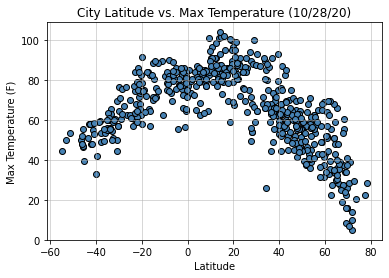

In [19]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], facecolor = "steelblue", edgecolor = "black")
#set titles
plt.title("City Latitude vs. Max Temperature (10/28/20)")
#set labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
#set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#save the plotted figure
plt.savefig("../output_data/Latitude vs. Temperature.png")
plt.show()


## Latitude vs. Humidity Plot

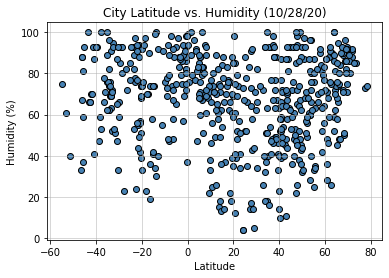

In [20]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], facecolor = "steelblue", edgecolor = "black")
#set titles
plt.title("City Latitude vs. Humidity (10/28/20)")
#set labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
#set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#save the plotted figure
plt.savefig("../output_data/Latitude vs. Humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

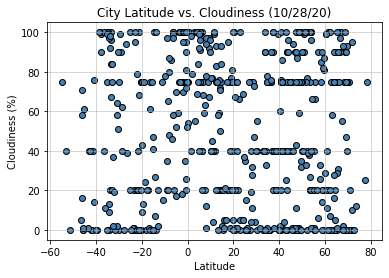

In [21]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], facecolor = "steelblue", edgecolor = "black")
#set titles
plt.title("City Latitude vs. Cloudiness (10/28/20)")
#set labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
#set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#save the plotted figure
plt.savefig("../output_data/Latitude vs. Cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

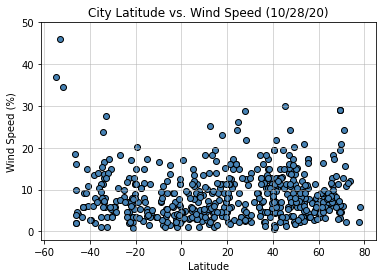

In [22]:
# Create Latitude vs. Wind Speed Plot scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
#set titles
plt.title("City Latitude vs. Wind Speed (10/28/20)")
#set labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
#set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

#save the plotted figure
plt.savefig("../output_data/Latitude vs. Wind Speed.png")
plt.show()


## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern = clean_city_data.loc[clean_city_data["Lat"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6644951847801386


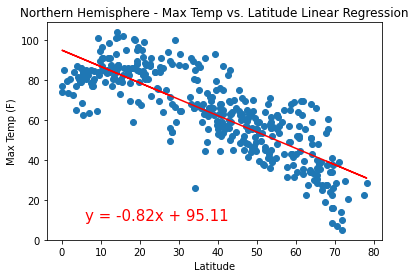

In [12]:
# Set up x y 
x_values = northern['Lat']
y_values = northern['Max Temp']
#set up the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#set up regression figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Northern- Max Temp vs.Latitude.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5880057276369808


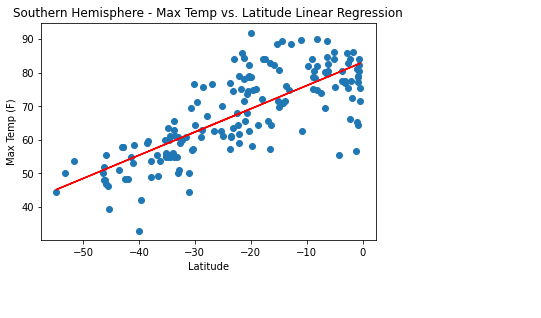

In [13]:
# Set up x y 
x_values = southern['Lat']
y_values = southern['Max Temp']
#set up the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#set up regression figure
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Southern- Max Temp vs.Latitude.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010729512501511093


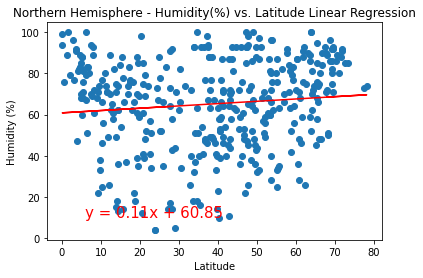

In [34]:
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Northern- Humidity(%) vs.Latitude.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012993556379100345


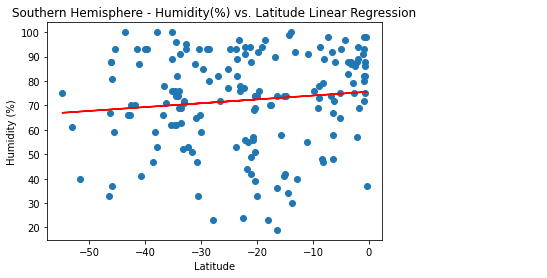

In [36]:
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Southern- Humidity(%) vs.Latitude.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.007627485925231673


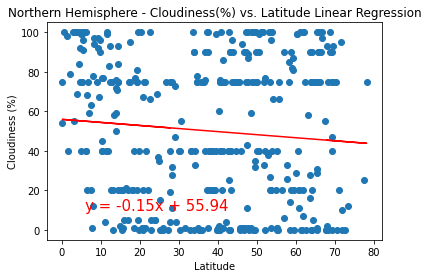

In [37]:
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Northern-Cloudiness(%) vs.Latitude.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05294530205984352


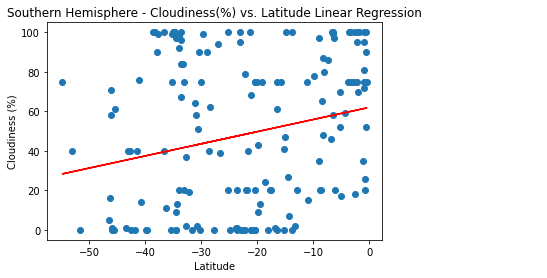

In [38]:
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Southern-Cloudiness(%) vs.Latitude.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.011478610492563554


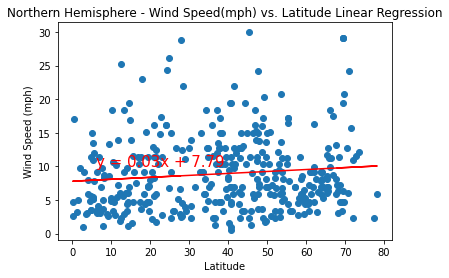

In [39]:
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Northern- Wind Speed(mph) vs.Latitude.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11293389416296593


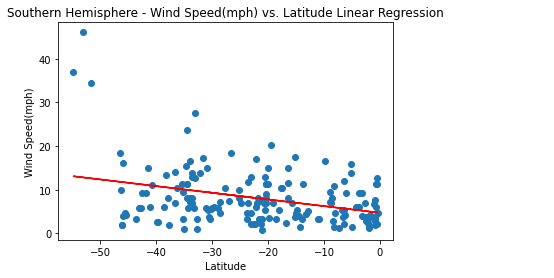

In [40]:
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Southern- Wind Speed(mph) vs.Latitude.png")
plt.show()

In [ ]:
# Conclusion:

# In both Northern and Southern areas, Latitude has very little realtion with Humidity, Cloudiness and Wind Speed, r-square values were very little.
# Max Temp vs. Latitude Linear Regression has a 66.45% and %58.8 R square values which means latitude can explain 66% and 59% of temperature in northern and southern areas, Latitude and Temperature are highly related